# Problem Statement:- 
Uber Data Analysis involves studying data related to Uber
rides, such as ride times, locations, and user ratings. The
analysis can be used to understand user behavior, driver
patterns, and areas of high demand

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('UberDataset.csv',parse_dates=['START_DATE','END_DATE'])
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
data.shape

(1156, 7)

# Observation:- 
- There are 1156 rows and 7 columns.
- Each row repesent the individual rides.

In [4]:
# Checking for null values in the dataset
data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [5]:
# Percentage of null values 
data.isnull().sum()/1156 * 100

START_DATE     0.000000
END_DATE       0.086505
CATEGORY       0.086505
START          0.086505
STOP           0.086505
MILES          0.000000
PURPOSE       43.512111
dtype: float64

In [6]:
# Converting columns name to lower case
data.columns=data.columns.str.lower()

In [7]:
# Missing value treatment 
data['purpose'] = data['purpose'].fillna('Unknown')
data.dropna(inplace=True)

In [8]:
# Again checking null value
data.isnull().sum()

start_date    0
end_date      0
category      0
start         0
stop          0
miles         0
purpose       0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  1155 non-null   object        
 1   end_date    1155 non-null   datetime64[ns]
 2   category    1155 non-null   object        
 3   start       1155 non-null   object        
 4   stop        1155 non-null   object        
 5   miles       1155 non-null   float64       
 6   purpose     1155 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 72.2+ KB


In [10]:
data.describe()

,miles
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


# Exploratory Data Analysis

### Analyzing Uber Trip Frequency

In [11]:
# Finding most busiest start and stop location 
busy_start_loc = data['start'].value_counts().idxmax()
busy_stop_loc = data['stop'].value_counts().idxmax()

#### Now let's visualize the number of trips starting from the busiest location and the number of trips ending at the busiest stop location

In [12]:
# Count the number of trips for each start location
start_loc_counts = data['start'].value_counts().reset_index()
start_loc_counts.columns = ['Location','No. of Starts']
start_loc_counts

,Location,No. of Starts
0,Cary,201
1,Unknown Location,148
2,Morrisville,85
3,Whitebridge,68
4,Islamabad,57
...,...,...
172,Florence,1
173,Ridgeland,1
174,Daytona Beach,1
175,Sky Lake,1


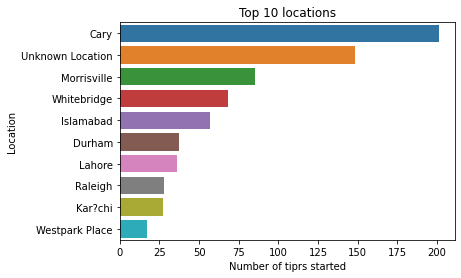

In [13]:
sns.barplot(x='No. of Starts',y='Location',data=start_loc_counts.head(10))
plt.title("Top 10 locations")
plt.xlabel("Number of tiprs started")
plt.ylabel("Location")
plt.show()

In [14]:
# Count the number of trips for each stop location
stop_loc_counts = data['stop'].value_counts().reset_index()
stop_loc_counts.columns = ['Location','No. of stops']
stop_loc_counts

,Location,No. of stops
0,Cary,203
1,Unknown Location,149
2,Morrisville,84
3,Whitebridge,65
4,Islamabad,58
...,...,...
183,Daytona Beach,1
184,Sand Lake Commons,1
185,Sky Lake,1
186,Vista East,1


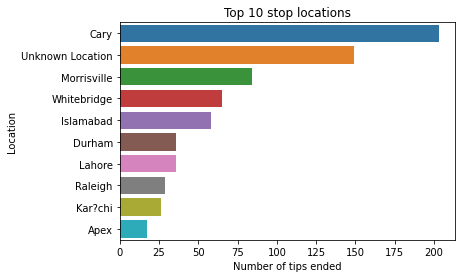

In [15]:
# Plot for stop locations
sns.barplot(x="No. of stops",y="Location",data=stop_loc_counts.head(10))
plt.title("Top 10 stop locations")
plt.xlabel("Number of tips ended")
plt.ylabel("Location")
plt.show()

## Peak Travel times: A Snapshot of Uber Trip bolume by Time of Day


In [16]:
data.isnull().sum()/len(data)

start_date    0.0
end_date      0.0
category      0.0
start         0.0
stop          0.0
miles         0.0
purpose       0.0
dtype: float64

In [17]:
data['start_date'] = pd.to_datetime(data['start_date'], format='%m-%d-%Y %H:%M', errors='coerce')
data['end_date'] = pd.to_datetime(data['end_date'], format='%m-%d-%Y %H:%M', errors='coerce')

In [18]:
data.dropna(inplace=True)

In [19]:
data['request_hour'] = data['start_date'].dt.hour

In [20]:
time_slots = {
    0:'Late Night',
    1:'Midnight',
    2:'Midnight',
    3:'Early Morning',
    4:'Early Morning',
    5:'Early Morning',
    6:'Morning',
    7:'Morning',
    8:'Morning',
    9:'Morning',
    10:'Morning',
    11:'Morning',
    12:'After Noon',
    13:'After Noon',
    14:'After Noon',
    15:'Afer Noon',
    16:'Evening',
    17:'Evening',
    18:'Evening',
    19:'Night',
    20:'Night',
    21:'Night',
    22:'Late Night',
    23:'Late Night'
}
time_slots

{0: 'Late Night',
 1: 'Midnight',
 2: 'Midnight',
 3: 'Early Morning',
 4: 'Early Morning',
 5: 'Early Morning',
 6: 'Morning',
 7: 'Morning',
 8: 'Morning',
 9: 'Morning',
 10: 'Morning',
 11: 'Morning',
 12: 'After Noon',
 13: 'After Noon',
 14: 'After Noon',
 15: 'Afer Noon',
 16: 'Evening',
 17: 'Evening',
 18: 'Evening',
 19: 'Night',
 20: 'Night',
 21: 'Night',
 22: 'Late Night',
 23: 'Late Night'}

In [21]:
data['time_slot'] = data['request_hour'].apply(lambda x:time_slots.get(x) )

In [22]:
data.head()

,start_date,end_date,category,start,stop,miles,purpose,request_hour,time_slot
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Midnight
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,After Noon


In [23]:
time_slot_counts = data.time_slot.value_counts()

In [24]:
time_slot_counts

Evening          109
After Noon        97
Night             76
Morning           74
Late Night        31
Afer Noon         28
Midnight           3
Early Morning      3
Name: time_slot, dtype: int64

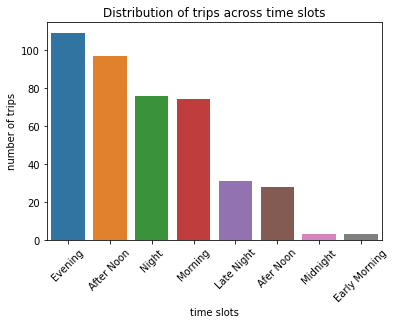

In [25]:
# Visulaization: Distribution of trips in different time slots
sns.barplot(x=time_slot_counts.index,y=time_slot_counts.values)
plt.title("Distribution of trips across time slots")
plt.xlabel('time slots')
plt.ylabel("number of trips")
plt.xticks(rotation=45)
plt.show()

#### From above graph we can clearly see that the most of the trip booked at Evening, and After noon.

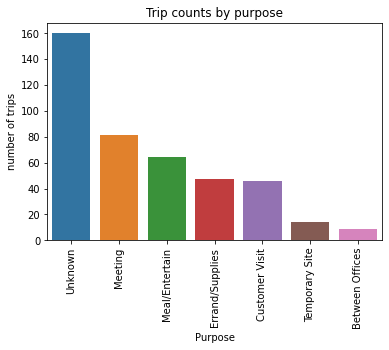

In [26]:
# Trip counts by purpose
purpose_count = data['purpose'].value_counts()
# Plot purpose distribution
sns.barplot(x=purpose_count.index,y=purpose_count.values)
plt.title("Trip counts by purpose")
plt.xlabel("Purpose")
plt.ylabel("number of trips")
plt.xticks(rotation=90)
plt.show()

In [27]:
data['request_hour'].unique()

array([21,  1, 20, 17, 14, 13,  8, 12, 15, 18, 19, 11, 16, 10,  9,  7,  3,
       23,  2,  0, 22,  5,  6], dtype=int64)

In [28]:
def map_time_slot(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12<= hour < 17:
        return 'After Noon'
    elif 17 <= hour <21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Night'
    elif 0<= hour < 5:
        return 'Late Night'
# Apply the function to the 'Request hour' to create the 'time slot' column
data['time_slot'] = data['request_hour'].apply(map_time_slot)

In [29]:
# Create a pivot table with sum of 'miles' for each 'time slot' and 'purspose'
pivot_table = data.pivot_table(index='time_slot',columns='purpose',values='miles',aggfunc='sum',fill_value=0)

In [30]:
pivot_table

purpose,Between Offices,Customer Visit,Errand/Supplies,Meal/Entertain,Meeting,Temporary Site,Unknown
time_slot,,,,,,,
After Noon,62.8,426.0,85.1,131.7,343.1,26.4,281.4
Evening,19.4,260.5,68.1,86.6,120.0,36.3,521.2
Late Night,0.0,0.0,7.4,14.3,214.5,0.0,5.0
Morning,12.2,136.5,20.2,28.5,148.2,45.9,266.7
Night,4.0,34.4,12.9,53.3,293.8,0.0,57.5


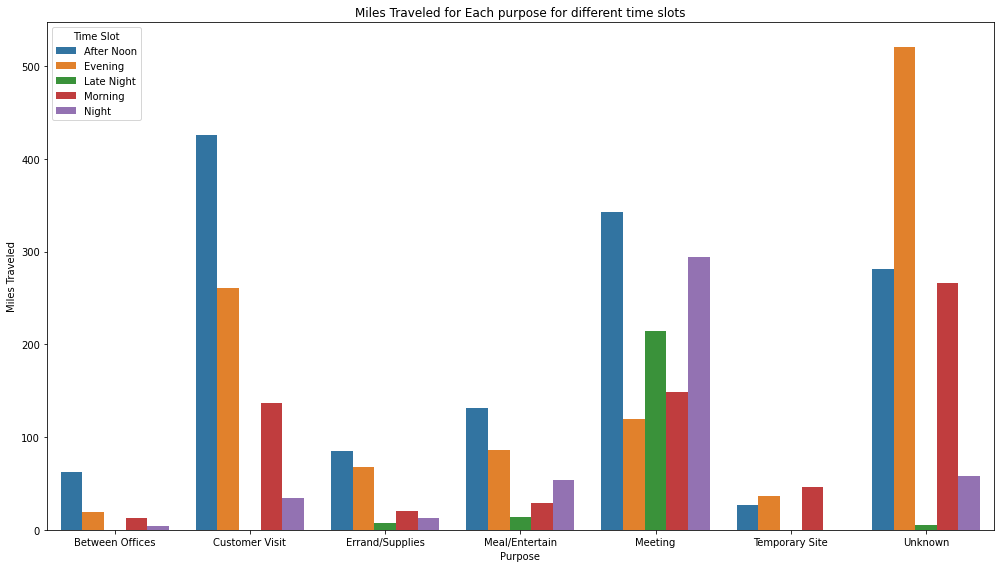

In [31]:
df_pivot = pd.DataFrame(pivot_table)
# For visualization, we will melt the DataFrame to work with seaborn
df_melted  = df_pivot.reset_index().melt(id_vars='time_slot', var_name='purpose', value_name='miles')

plt.figure(figsize=(14,8))
sns.barplot(x='purpose',y='miles',hue='time_slot',data=df_melted)
plt.title("Miles Traveled for Each purpose for different time slots")
plt.xlabel("Purpose")
plt.ylabel("Miles Traveled")
plt.legend(title="Time Slot")
plt.tight_layout()
plt.show()


# Histogram of Trip Miles:
The histogram shows a right-skewed distribution of miles traveled per trip, indicating that most trips are short. There's a high frequency of trips with a small number of miles, probably within a city or a short distance. The long trail to the right suggests there are fewer long-distance trips, but they do occur.

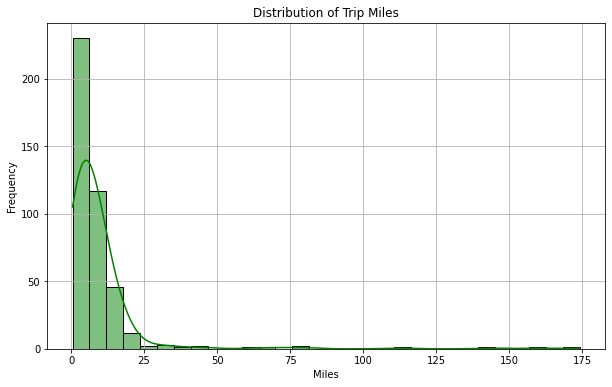

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data['miles'],bins=30,kde=True,color='green')
plt.title("Distribution of Trip Miles")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Comparative Overview of Trip Lengths for Business and Personal Categories
The bar chart illustrates the average distance traveled for trips under two distinct categories: Business and Personal. The average mileage for Business trips is shown to be slightly higher than for personal trips. This representation helps in understanding the differences in travel Patterns associated with the purpose of the trips, indicating that Business trips may typically cover longer distances.

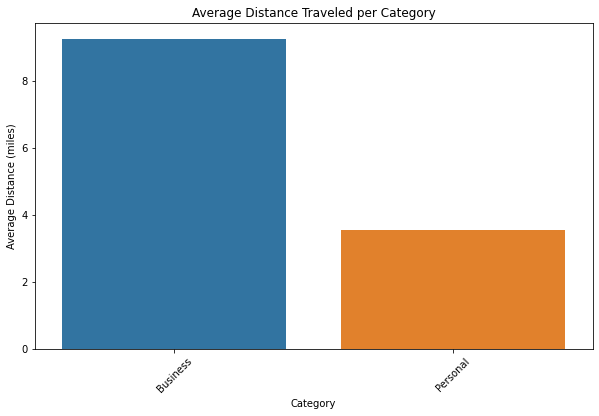

In [33]:
avg_distance_per_category = data.groupby('category')['miles'].mean()

# Convert the Series to DataFrame for plotting.
avg_distance_per_category_df = avg_distance_per_category.reset_index()

# Plotting the average distance per category
plt.figure(figsize=(10,6))
sns.barplot(x='category',y='miles',data=avg_distance_per_category_df)
plt.title("Average Distance Traveled per Category")
plt.xlabel("Category")
plt.ylabel("Average Distance (miles)")
plt.xticks(rotation=45)

plt.show()

# Bar chart of Trip Categories:
This chart clearly indicates the predomiance of one category over the other. If, for example,'Business' trips are significantly more than 'Personal' trips, it suggests that the dataset is primarily comprised of business-related travel.The imbalance between the categores could be relevant for any analysis or model training, as it indicates a skew in the types of trips recorded. 

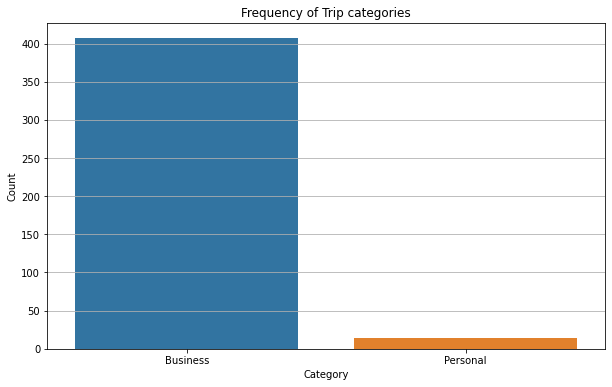

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data,x='category')
plt.title('Frequency of Trip categories')
plt.xlabel('Category')
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

# Scatter plot of Time of Day vs. Miles Traveled:
This scatter plot helps in understanding if there's any correlation between the time of day and the length of the trip. A concentration of points during certain hours could indicate popular times for trips. Any visible pattern, like longer trips occuring during certain hours, could suggest trends like longer commutes or travel during specific tiems of the day.

Each chart provides a different perespective on the data, revealing various aspects of trip behavior, preferences, and patterns. By analyzing these visualizations, one can gain a deeper understanding of the underlying dynamics of the trip data.

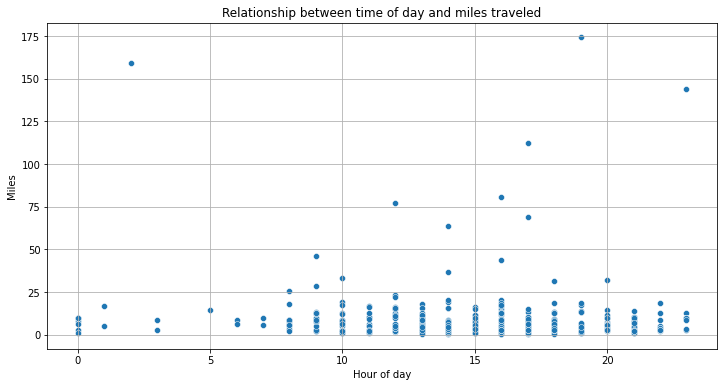

In [35]:
data['hour_of_day'] = data['start_date'].dt.hour
plt.figure(figsize=(12,6))
sns.scatterplot(data=data,x='hour_of_day',y='miles')
plt.title('Relationship between time of day and miles traveled')
plt.xlabel("Hour of day")
plt.ylabel("Miles")
plt.grid(True)
plt.show()

# Uber Trip Trends Over the Year
- The line graph illustrates the frequency of daily Uber trips over teh course of a year, with the x-axis representing time from January to December and the y-axis indicating the number og trips per day. the plot show variability in trip frequecy, with certain days experiencing higher numbers of trips. There are notable peaks which may correspond to special events or holidays. The overall trend suggests fluctuating demand with no clear pattern of seasonality, highlighting the dynamic nature of ride-hailing services.

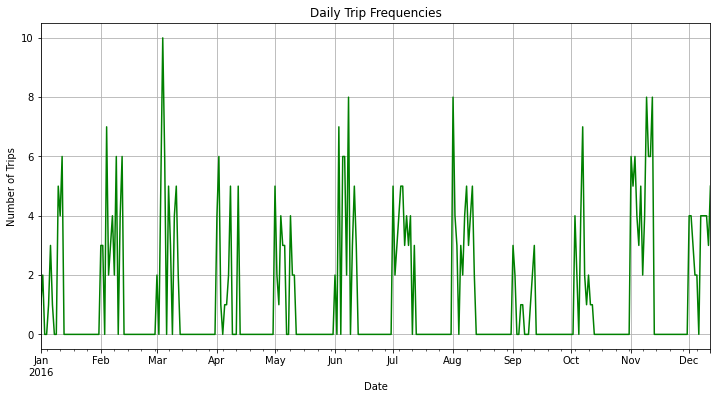

In [39]:
daily_trips = data.resample('D',on='start_date').size()
plt.figure(figsize=(12,6))
daily_trips.plot(title="Daily Trip Frequencies",color = 'g')
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.show()

# Histogram of Uber Trip Durations
- The historgram displays the distribution of trip durations for Uber rides, with the duration in minutes on the x-axis and the frequency of trips on the y-axis. The majority of trips are short, with durations clustered around 5 to 15 minutes. The frequency dramatically decreases for longer trips, indicating that longer rides are much less common. This pattern suggest that the Uber service is predominantly used for short to medium-length journeys.


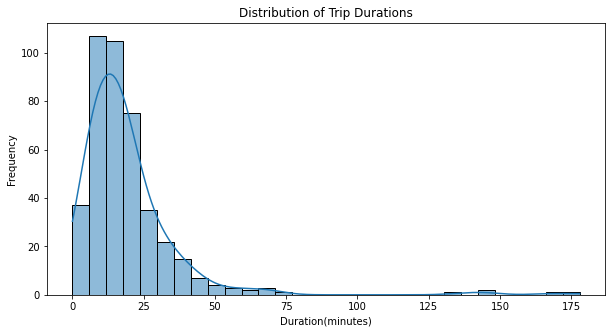

In [43]:
data['duration'] =( data['end_date'] - data['start_date']).dt.total_seconds()/60

# plot distribution of trips durations
plt.figure(figsize=(10,5))
sns.histplot(data['duration'],bins=30,kde=True)
plt.title("Distribution of Trip Durations")
plt.xlabel("Duration(minutes)")
plt.ylabel("Frequency")
plt.show()

In [44]:
data.head()

,start_date,end_date,category,start,stop,miles,purpose,request_hour,time_slot,hour_of_day,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Night,21,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Late Night,1,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,20,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Evening,17,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,After Noon,14,67.0
